In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('datasets/spotify.csv')
pd.set_option('display.max_columns',21)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [7]:
drop_genre = ['afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock','k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n-roll',
       'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish', 'world-music']
df.drop(df[df['track_genre'].isin(drop_genre)].index,inplace=True)
df = df.reset_index(drop=True)

In [8]:
df['track_genre'].unique()

array(['acoustic', 'indie', 'jazz', 'pop', 'rock'], dtype=object)

In [9]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [10]:
X = df[['danceability','energy','loudness','speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df[['track_genre']]
X.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.181496,0.182699,0.202339,-0.200133,-0.032087,-0.051855,0.399501,-0.110297
energy,0.181496,1.000000,0.797815,0.173785,-0.797494,-0.084420,0.161819,0.393428,0.191065
loudness,0.182699,0.797815,1.000000,0.093077,-0.646860,-0.215050,0.115871,0.269500,0.143676
speechiness,0.202339,0.173785,0.093077,1.000000,-0.124051,-0.021378,0.154633,0.159409,0.136836
acousticness,-0.200133,-0.797494,-0.646860,-0.124051,1.000000,0.070539,-0.081431,-0.268126,-0.178441
instrumentalness,-0.032087,-0.084420,-0.215050,-0.021378,0.070539,1.000000,-0.017835,-0.111581,-0.038742
liveness,-0.051855,0.161819,0.115871,0.154633,-0.081431,-0.017835,1.000000,0.078047,0.031149
valence,0.399501,0.393428,0.269500,0.159409,-0.268126,-0.111581,0.078047,1.000000,0.107504
tempo,-0.110297,0.191065,0.143676,0.136836,-0.178441,-0.038742,0.031149,0.107504,1.000000


<Axes: >

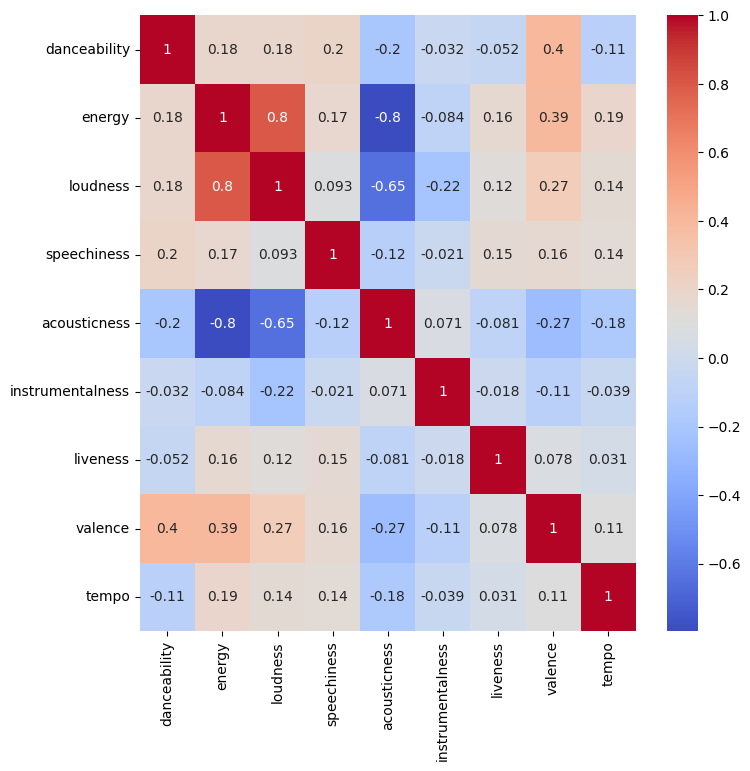

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)

In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# scaled = pd.DataFrame(X,columns=['danceability', 'energy','loudness','speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo','time_signature'])
# scaled['track_genre']=y

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

len(x_train),len(x_test), len(y_train), len(y_test)

(3500, 1500, 3500, 1500)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
predictions = knn.predict(x_test)
print(knn.score(x_test,y_test)*100)

54.266666666666666


<Axes: >

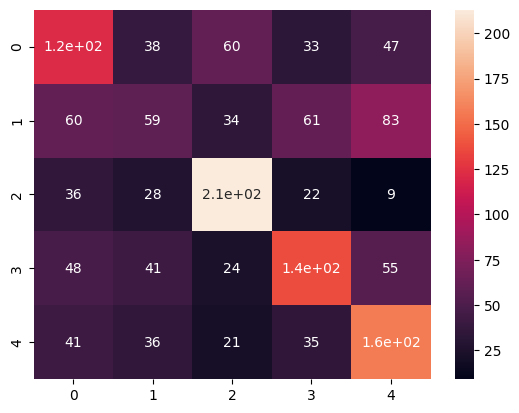

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions).round(4)

sns.heatmap(cm,annot=True)

In [20]:
error_rate = []
for i in range(21,81,2):
    reg_knn = KNeighborsClassifier(n_neighbors=i)
    reg_knn.fit(x_train,y_train)
    pred_i = reg_knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

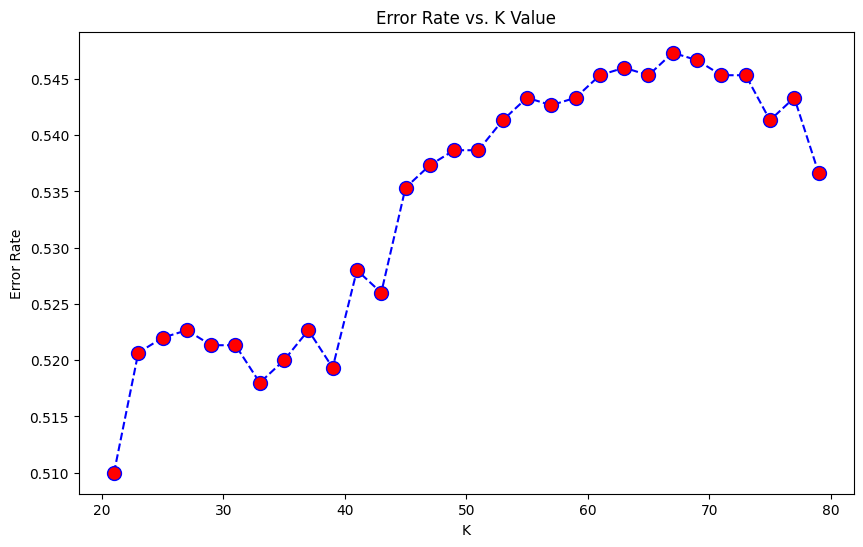

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(21,81,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')